# Lecture 3 - Linear Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Image number problem

- brute force: do a linear regression with every pixel (256 total) being a variable 
- smart: use 3 variables (pixel, intensity and symmetry)
- lpa: show the data is not linearly separably by lpa
- pocket lpa: apply lpa and keep only the best score "in your pocket"

In [11]:
data = load_digits()
data['data'].shape

(1797, 64)

In [12]:
data['target'][0], data['images'][0]

(0,
 array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]))

<AxesSubplot:>

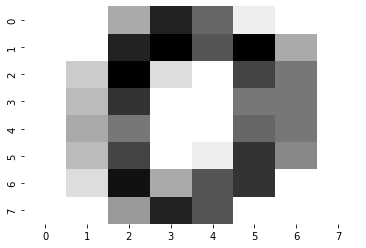

In [13]:
sns.heatmap(data['images'][0], cbar=False, cmap='gray_r')

### The "wrong" way

Applying the approach of considering every pixel as a variable, and applying a classification algorith. To simplify things, let's compare only two numbers: 1 e 5

dataset size: 182


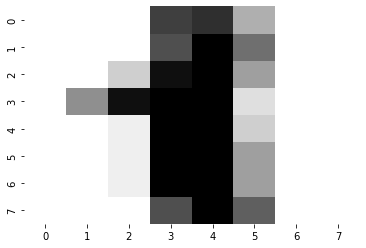

dataset size: 182


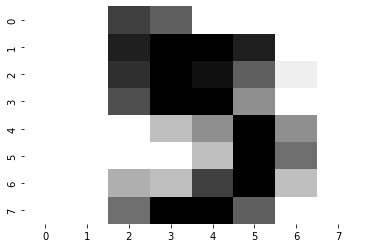

In [14]:
# Selecting the sample from dataset.

def filtering_data(whole_data, number):
    ''' Return only the specified number data from the original dataset. '''
    index = whole_data['target'] == number
    filtered_data = whole_data['data'][index]
    figure_data = whole_data['images'][index]
    
    # Checking the result
    print(f"dataset size: {len(filtered_data)}")
    sns.heatmap(figure_data[0], cbar=False, cmap='gray_r')
    plt.show()

    return filtered_data, figure_data


data1, image1 = filtering_data(data, 1)
data5, image5 = filtering_data(data, 5)

In [15]:
# Processing the sample before training the model.

df_number1 = pd.DataFrame(data1)
df_number1['target'] = 1

df_number5 = pd.DataFrame(data5)
df_number5['target'] = 5

df = pd.concat([df_number1, df_number5], axis=0, ignore_index=True)
X = df.loc[:, 0:63]
y = df['target']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(364, 64) (364,)
(291, 64) (73, 64) (291,) (73,)


In [16]:
# Predicting and measuring the accuracy.
model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1.0
[[37  0]
 [ 0 36]]


Predicted number: 5


<AxesSubplot:>

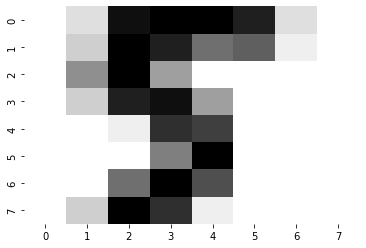

In [17]:
print(f"Predicted number: {y_pred[0]}")
sns.heatmap(np.array(df.loc[y_test.index[0], 0:63]).reshape(8, 8), cbar=False, cmap='gray_r')

**Conclusion:**
the model classified correctly the numbers 1 and 5. Curiosly, it didn't exactly confirmed our hypothesis that using every pixel as a variable was a bad way of doing things, but it certainly doesn't prove it is the better way.

### The "right" way

In a more "efficient" approach, only 3 features will be used:
1. image index
2. average intensity of color
3. average simetry

In [200]:
def image_decomposition(data):
    """
    Obtain 3 features from an 8x8 matrix: location, intensity and simetry. 
    """
    index_list = list(range(len(data1)))
    intensity_list = []
    simetry_list = []
    df = pd.DataFrame()
    for i in data:
        intensity_list.append(i.mean())
        #simetry_transpose_score = (i - np.resize(np.resize(i, (8, 8)).T, (1, len(i)))).mean()
        simetry_vertical = i - np.resize(np.flip(np.resize(i, (8, 8)), 0), (1, len(i)))
        simetry_horizontal = i - np.resize(np.flip(np.resize(i, (8, 8)), 1), (1, len(i)))
        simetry_score = (abs(simetry_vertical) + abs(simetry_horizontal)).mean()
        simetry_list.append(simetry_score)

    df = pd.DataFrame({'index':index_list, 'intensity':intensity_list, 'simetry':simetry_list})
    return df

In [201]:
df1 = image_decomposition(data1)
df1['target'] = 1

df5 = image_decomposition(data5)
df5['target'] = 5

df = pd.concat([df1, df5], axis=0, ignore_index=True)
df.sample(3)

,index,intensity,simetry,target
359,177,4.71875,7.250,5
85,85,5.68750,5.000,1
43,43,4.87500,6.875,1


In [115]:
X = df.drop(columns='target')
y = df['target']
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Predicting and measuring the accuracy.
model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(23296, 3) (23296,)
(18636, 3) (4660, 3) (18636,) (4660,)
0.4978540772532189
[[1053 1277]
 [1063 1267]]
